## **Task 1: Regression Analysis**


**Objectives**
- Split the dataset into training and testing sets.
- Fit a linear regression model using scikit-learn.
- Interpret the coefficients and evaluate the model using
metrics such as R-squared and mean squared error.



#### 1. Load data

In [3]:
import pandas as pd

boston_housing = pd.read_csv('D:\Codveda-Technologies\Level 2\BostonHousing.csv')

print(boston_housing.head())
print(boston_housing.info())

#Check columns
print(boston_housing.columns)

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float6

#### 2. Choose Features

Let's pick single feature. 
`RM`(average number of rooms).
Let's predict `MEDV`(median house value)

In [5]:
X = boston_housing[['rm']]     #predictor variable(s)
y = boston_housing['medv']     #target variable

#### 3. Split Data

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 4. Fit Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression

#Initialize the model
model = LinearRegression()

#Fit model
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


#### 5. Interpret Coefficients



In [8]:
print("Intercept:", model.intercept_)
print("Coefficient for RM:", model.coef_[0])

Intercept: -36.24631889813792
Coefficient for RM: 9.348301406497722


We see that coefficient is positive i.e. `MEDV` increases as `RM` increases

#### 6. Evaluate model

R² Score and MSE

In [11]:
from sklearn.metrics import r2_score, mean_squared_error

# Predicting on test set
y_pred = model.predict(X_test)

# Calculating R² score and MSE
r2 = r2_score(y_test, y_pred)   
mse = mean_squared_error(y_test, y_pred)

print("R² Score:", r2)
print("Mean Squared Error:", mse)


if r2 > 0.5:
    print("The model explains a good portion of the variance in house prices based on the number of rooms.")
else:
    print("The model explains only a modest portion of the variance in house prices based on the number of rooms.")

print("A lower MSE indicates better predictive accuracy. Here, the MSE suggests the average squared difference between predicted and actual values.")


R² Score: 0.3707569232254778
Mean Squared Error: 46.144775347317264
The model explains only a modest portion of the variance in house prices based on the number of rooms.
A lower MSE indicates better predictive accuracy. Here, the MSE suggests the average squared difference between predicted and actual values.


#### 7. Plot Regression Line

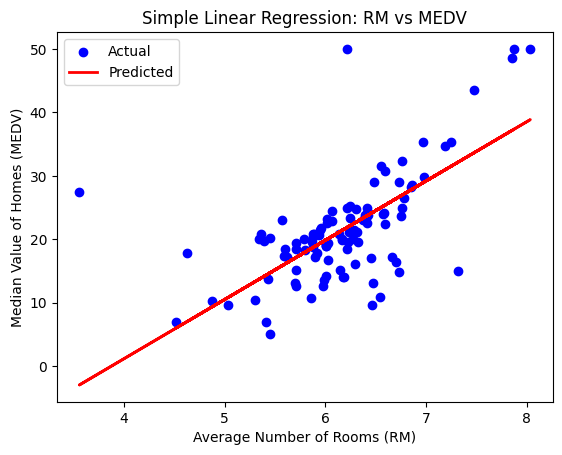

In [12]:
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted',linewidth=2)

plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('Median Value of Homes (MEDV)')
plt.title('Simple Linear Regression: RM vs MEDV')

plt.legend()
plt.show()

In [13]:
# Interpretation of the regression results

print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficient for RM: {model.coef_[0]:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

print("\nInterpretation:")
print(f"- The intercept ({model.intercept_:.2f}) represents the predicted median house value when RM (average number of rooms) is zero.")
print(f"- The coefficient for RM ({model.coef_[0]:.2f}) means that for each additional room, the median house value increases by approximately {model.coef_[0]:.2f} (in $1000s).")
print(f"- The R² score ({r2:.2f}) indicates that about {r2*100:.1f}% of the variance in house prices is explained by the number of rooms.")
print(f"- The MSE ({mse:.2f}) shows the average squared difference between predicted and actual values; lower is better.")

Intercept: -36.25
Coefficient for RM: 9.35
R² Score: 0.37
Mean Squared Error: 46.14

Interpretation:
- The intercept (-36.25) represents the predicted median house value when RM (average number of rooms) is zero.
- The coefficient for RM (9.35) means that for each additional room, the median house value increases by approximately 9.35 (in $1000s).
- The R² score (0.37) indicates that about 37.1% of the variance in house prices is explained by the number of rooms.
- The MSE (46.14) shows the average squared difference between predicted and actual values; lower is better.
